# Computation
***

Computation is a branch of computer science that explores types of problems where solutions can be created using computers. Commonly, when a computer comes to mind, it is thought of as a physical machine, but it can be anything that can do computation; these were abstract machines before the dawn of modern computing.

This notebook will explore these topics:
1. Types of growth rates and notations used to represent them
2. The Turing machine and an algorithm to check if the input contains all zeros
3. Examples of bit twiddling
4. An explanation of complex numbers and how to use them
5. Experiments, including double-slit and Stern–Gerlach that are relevant to quantum computing

***
## 1. Growth Rate and Notation
An understanding of the different types of growth rates is important (examples include linear and polynomial growth) when the complexity of algorithms is being discussed.

Growth rate notations are used to measure how many resources (time or memory) are required to run an algorithm in relation to the input size. The most commonly used notation is the Big O as it describes the worst-case scenario. These notations can be used to analyze how efficient an algorithm is.

1. The Big O (Big Oh) is defined as an upper bound on the algorithm in question, this means that when input $n$ is passed to the algorithm, the output of the Big O function must be more than or equal to the output of the algorithm in question.

1. The Big Omega (Big $\Omega$) is defined as a lower bound on the algorithm in question, this means that when input $n$ is passed to the algorithm, the output of the Big Omega function must be less than or equal to the output of algorithm in question.

3. The Big Theta (Big $\Theta$) is defined as a tight bound on the algorithm in question, this means that the worst-case scenario will also be the best-case scenario, when input $n$ is passed to the algorithm, the output of the Big Theta function must equal to the output of algorithm in question.

### Growth Rate Types
Below you will find a plot of five different types of growth (logarithm, linear, quadratic, cubic, and exponential).

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# These are helper functions for plots below
def factorial(n_array):
    """ Calculates the factorial for each value in the n_array """
    n_array = n_array.copy()
    for i in range(len(n_array)):
        n_array[i] = math.factorial(int(n_array[i]))
    return n_array

def log(n_array):
    """ Calculates the logarithm for each value in the n_array """
    return [math.log(n) for n in n_array]

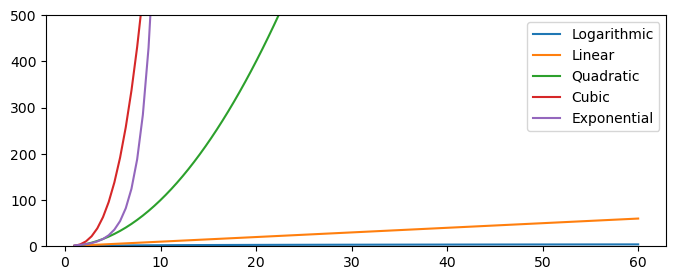

In [2]:
fig, ax = plt.subplots(figsize=(8, 3))
n = np.linspace(1, 60, 100)

# Plot logarithm
ax.plot(n, log(n), label="Logarithmic")
# Plot linear, growth is same as input size
ax.plot(n, n, label="Linear")
# Plot polynomial with degree 2 (Square/Quadratic)
ax.plot(n, n ** 2, label="Quadratic")
# Plot polynomial with degree 3 (Cubic)
ax.plot(n, n ** 3, label="Cubic")
# Plot exponential, exponent is changing
ax.plot(n, 2 ** n, label="Exponential")

# Set y to a limit, because I want to show the functions with slower growths
plt.ylim([0, 500])
    
ax.legend()
plt.show()

***
### Exercise 1
Describe and plot five examples of pairs of functions $f$ and $g$ such that $f$ is $O(g)$.

1. $f(n): n$ and $g(n): n / 4$<br>
$f$ is a linear function, and $g$ is a linear function as well.
but will always be below $f$, due to the division by 4.

2. $f(n): n^2$ and $g(n): log(n)$<br>
$f$ denotes a polynomial, and $g$ denotes a logarithm.
logarithms' growth is slower than n's.

3. $f(n): n^2$ and $g(n): n$<br>
$f$ denotes a polynomial, and $g$ denotes a linear function.
squared will grow faster as its $g$, but squared.

4. $f(n): n^3$ and $g(n): n^2$<br>
$f$ is a degree 3 polynomial, and $g$ is a degree 2 polynomial.
Both lack a constant part, so the higher polynomial grows faster than the lower one.

5. $f(n): n!$ and $g(n): n^9$<br>
$f$ is a factorial, and $g$ is a 9-degree polynomial.
factorial growth will always be higher than the highest possible polynomial.

In [3]:
func_pair_list = [
    {
        "func_f": lambda n: n, "func_g": lambda n: n / 4,
        "func_f_label": r"$f: n$","func_g_label": r"$g: \frac{n}{4}$"
    },
    {
        "func_f": lambda n: n ** 2, "func_g": lambda n: log(n),
        "func_f_label": "$f: n^2$", "func_g_label": "$g: log(n)$"
    },
    {
        "func_f": lambda n: n ** 2, "func_g": lambda n: n,
        "func_f_label": "$f: n^2$", "func_g_label": "$g: n$"
    },
    {
        "func_f": lambda n: n ** 3, "func_g": lambda n: n ** 2,
        "func_f_label": "$f: n^3$", "func_g_label": "$g: n^2$"
    },
    {
        "func_f": lambda n: factorial(n), "func_g": lambda n: n ** 2,
        "func_f_label": "$f: n!$", "func_g_label": "$g: n^9$"
    }
]

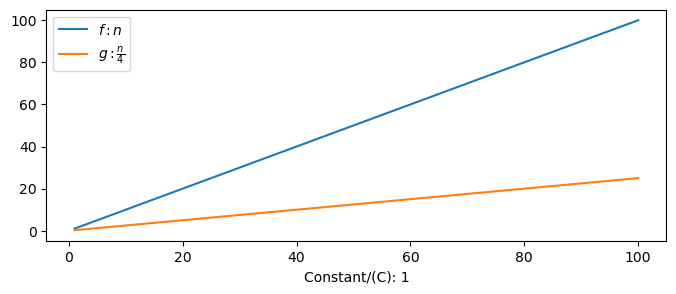

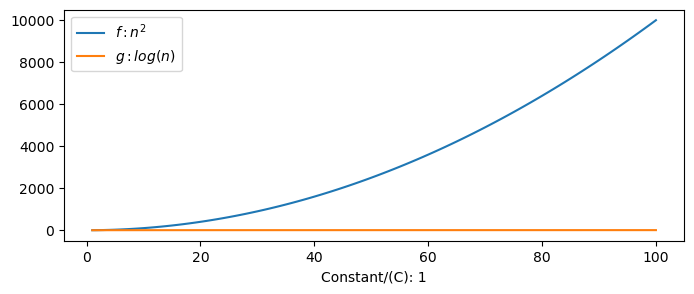

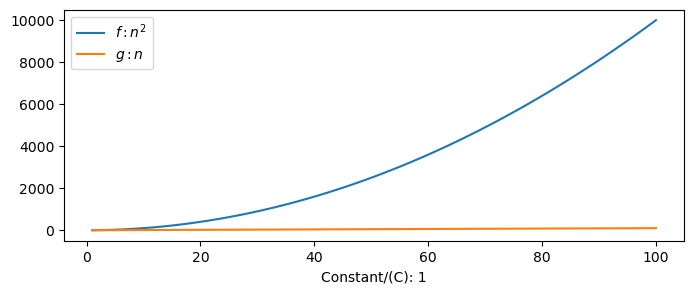

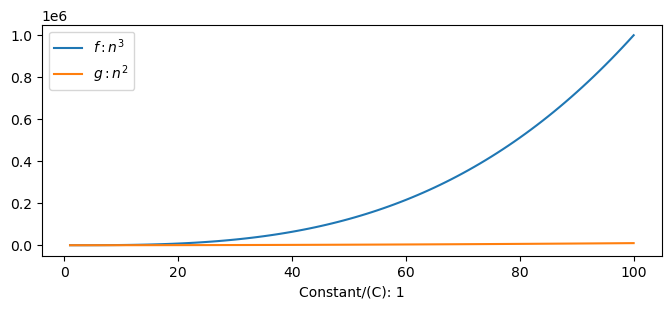

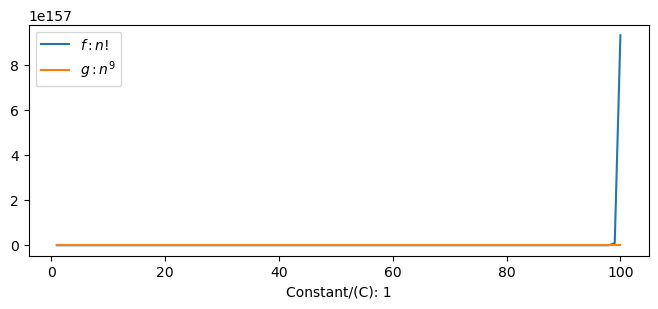

In [4]:
# Iterate through all the function pairs
for plot_i in range(len(func_pair_list)):
    fig, ax = plt.subplots(figsize=(8, 3))
    n = np.linspace(1, 100, 100)
    
    # Get the lambda function of each and their labels
    func_f, func_g = func_pair_list[plot_i]["func_f"], func_pair_list[plot_i]["func_g"]
    func_f_label = func_pair_list[plot_i]["func_f_label"]
    func_g_label = func_pair_list[plot_i]["func_g_label"]
    constant_c = 1
    
    # Plot each algorithm and their labels
    ax.plot(n, func_f(n), label=func_f_label)
    ax.plot(n, func_g(n) * constant_c, label=func_g_label)
    ax.set_xlabel("Constant/(C): " + str(constant_c))
    
    ax.legend()
    plt.show()

***
## 2. Turing Machine
The Turing machine is a model of computation introduced by Alan Turing that describes an abstract machine.

It is made up of three major parts: **ticker tape**, **tape heads**, and a **state table**.

1. The ticker tape holds the input, output, and memory during execution. It consists of a number of cells, each containing a symbol (which can be any character, not just alphanumeric).

2. The tape head is the cell currently being read. After an operation is performed, the tape head can move either left or right.

3. The state table lists all the possible states of the machine and specifies the movement of the tape head (either left or right) and the next symbol for the current state.

### Python implementation
The Python code below is derived from Ian McLoughlin's `03-computation.ipynb` notebook, it implements a Turing machine.

I have turned it into a function to allow for reuse; when it goes into the halting state, it returns the current state.

In [5]:
def run_turing_machine(tape, current_state, table, debug_messages=False):
    pos = 0 # Position on tape.
    
    # Keep going while we are not in a halting state.
    while current_state not in ['T', 'F']:
        # Print the current status.
        if debug_messages == True:
            print(''.join(tape[:pos]) + current_state + ''.join(tape[pos:]))
        # Get the row of the table.
        row = table[(current_state, tape[pos])]
        # Overwrite the symbol.
        tape[pos] = row[0]
        # Move left or right.
        if row[1] == 'R':
            # Put blanks on tape as necessary.
            if pos == len(tape) - 1:
                tape += ['_']
            # Increase position.
            pos += 1
        else:
            # Put blanks on tape as necessary.
            if pos == 0:
                tape = ['_'] + tape
                # The position on the tape has to move with it.
                pos += 1
            # Decrease position.
            pos -= 1
        # Update the state.
        current_state = row[2]

    # Print the current status.
    if debug_messages == True:
        print(''.join(tape[:pos]) + current_state + ''.join(tape[pos:]))
        
    return current_state

### Exercise 2
Create a state table that checks if the input tape contains all zeros. For code reuse, I've made this into a function that returns True if the input contains all zeros.

The machine begins in the state **X**. If it finds a **1** while in the **X** state, it enters the **Y** state; if the machine is still in the **X** state when it enters the halt state, it did not find any **1**s, so the final state is **T** for true. 

In [6]:
def contain_all_zero(tape):
    # State table.
    state_table = {
        ('X', '_'): ['_', 'R', 'T'],
        ('X', '0'): ['0', 'R', 'X'],
        ('X', '1'): ['1', 'R', 'Y'],
        ('Y', '_'): ['_', 'R', 'F'],
        ('Y', '0'): ['0', 'R', 'Y'],
        ('Y', '1'): ['1', 'R', 'Y'],
    }

    return run_turing_machine(tape, 'X', state_table, False) == 'T'

I have created a list of test cases for the function above, with the input on the left and the correct output on the right.

In [7]:
test_cases = [
    (list("0101111"), False),
    (list("1111111"), False),
    (list("1101110"), False),
    (list("0000000"), True)
]

print("Contain all zeros?")
for test in test_cases:
    # Iterating through all the test cases, printing the result
    print(''.join(test[0]), contain_all_zero(test[0]))

# Check if the results of all the test cases are True
all_tests_pass = all([contain_all_zero(test[0]) == test[1] for test in test_cases])
if all_tests_pass: print("All tests pass")

Contain all zeros?
0101111 False
1111111 False
1101110 False
0000000 True
All tests pass


***
## 3. Bit Twiddling

Memory on computers is organized into bytes and is highly optimized for this purpose. To speed up computations, processors often use lookup tables. Manipulating individual bits can be costly because of the way memory is indexed and optimized.

In the examples below, I implement a function that iterates through a list of characters and converts each to upper/lower-case at the bit level, and an example of multiplication without using the `*` operator.

In [8]:
import random

def to_upper(s):
    # Using a bit mask you can convert any ASCII char to its upper case version
    # This is possible because in ASCII the upper case equivilent
    # Is only different by one bit
    return ''.join([chr(ord(ch) & 0b1011111) for ch in s])

def to_lower(s):
    # Doing the same as above, but adding the bit that
    # differentiates lower from uppercase (1 << 5)
    return ''.join([chr(ord(ch) | (ord('a') - ord('A'))) for ch in s])

def multiply_by_two(x):
    # Since computers store data in bits
    # Shifting to the left will move each bit power to the next number
    # And multiply it by two
    return x << 1

In [9]:
print('"Hello" to uppercase:', to_upper("Hello"))
print('"HELlo" to lowercase:', to_lower("HELlo"))

random_num = random.randint(0, 200)
print(f"multiply_by_two({random_num}) =", multiply_by_two(random_num))

"Hello" to uppercase: HELLO
"HELlo" to lowercase: hello
multiply_by_two(117) = 234


***
## 4. Complex Numbers
Before going into the next two topics, which are the Fourier transform and quantum computing, it is important to have an understanding of complex numbers.

The set of all possible complex numbers is bigger than the set of real numbers. A complex number is a number with an extra dimension. This is evident when plotted on an Argand diagram, with the Y axis representing the complex dimension and the X axis representing the real part.

In mathematics, the result of $\sqrt{-1}$ is not defined, meaning you can't square it. Complex numbers were invented to solve this problem, allowing the result of $\sqrt{-1}$ to be represented as $i$, allowing you to continue with your calculations while ignoring this problem.

When you square $i$, it returns to being $-1$, in your calculations, at some point you might square the complex number, and the result might not even contain any complex numbers.

### Complex Number Arithemtic
This is an example of how to represent and manipulate complex numbers in Python without the built-in complex type.

But this is not needed at all because Python natively supports complex numbers, unlike JavaScript, which does not have it built-in and requires you to implement it yourself or use a library.

In [10]:
def add_complex_nums(x, y):
    """ Add complex numbers x and y """
    return tuple([(x[i] + y[i]) for i in range(len(x))])

def mul_complex_nums(x, y):
    """ Multiply complex numbers x and y
    using the complex number multiplication formulae """
    a1, b1 = x
    a2, b2 = y
    return (a1 * a2 - b1 * b2, a1 * b2 + b1 * a2)

In this example, the complex numbers are represented as tuples, with the real part at index 0 and the imaginary part at index 1.

In [11]:
complex_num1, complex_num2 = (3, 5), (-2, 7)

sum_of_complex_nums = add_complex_nums(complex_num1, complex_num2)
print(f"The sum of the two numbers is: {sum_of_complex_nums}")

product_of_complex_nums = mul_complex_nums(complex_num1, complex_num2)
print(f"The product of the two numbers is: {product_of_complex_nums}")

The sum of the two numbers is: (1, 12)
The product of the two numbers is: (-41, 11)


#### Making a Complex Datatype
This is an object-oriented way of abstracting a complex number; the values of the real and imaginary parts are abstracted away, and methods for performing arithmetic are overloaded, allowing it to be used like a number in Python.

In [12]:
# In python complex numbers are abstracted into a class
# There is methods overriding the arithmetic operations
class Complex:
    def __init__(self, a, b):
        """ Initialise the Complex number object with
        a real part A, and imaginary B"""
        self.a, self.b = a, b
    
    # Python allows you to override methods for (+, -, /, *),
    # allowing them to behave like numbers,
    # this is called duck typing.
    def __add__(self, other):
        return Complex(self.a + other.a, self.b + other.b)
    
    def __mul__(self, other):
        return Complex(self.a * other.a - self.b * other.b,
                self.a * other.b + self.b * other.a)
    
    # Return a string when str(x) is called on it
    def __str__(self):
        return f"Complex({self.a}, {self.b})"
    
print(f"Complex(3, 5j) * Complex(-2, 7j): {Complex(3, 5) * Complex(-2, 7)}")

Complex(3, 5j) * Complex(-2, 7j): Complex(-41, 11)


## Built-in Python Complex Numbers
The following is an example of how to store complex numbers in Python and how to perform arithmetic on them.

In [13]:
# Creating complex numbers, notice the j instead of the i
complex_num1 = 3 + 5j
complex_num2 =  -2 + 7j

# Performing arithemtic on them is no different
# than with real numbers.
print(sum_of_complex_nums := complex_num1 + complex_num2)
print(product_of_complex_nums := complex_num1 * complex_num2)

(1+12j)
(-41+11j)


## 5. Experiments

### Double Slit Experiment
The double-slit experiment shows that energy and matter behave like both particles and waves.

In the experiment, a beam of electrons is sent to a screen with two slits in it; when the electrons go through the slits, they hit a detector screen, creating an interference pattern and exhibiting the behavior of a wave. When this experiment is done with the electrons individually, they behave like particles.

This experiment is significant because it shows that energy and matter change their behavior when being observed.

### Stern–Gerlach Experiment
The Stern-Gerlach experiment also shows that energy and matter behave like both particles and waves.

In the experiment, a bean of particles (these being silver atoms) is sent through a device known as a Stern-Gerlach magnet. The device contains two magnetic fields (both of which are perpendicular to each other) that are applied to the atoms passing through it. Depending on the orientation of their magnetic moments, the atoms were deflected in one of two directions.

However, when the experiment is performed with the atoms individually, they behave like particles (like in the experiment above).

## References
* https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/03-computation.ipynb<br>
* https://en.wikipedia.org/wiki/Theory_of_computation<br>
* https://www.geeksforgeeks.org/difference-between-big-oh-big-omega-and-big-theta/<br>
* https://www.youtube.com/watch?v=0D7yInuKvKs<br>
* https://introcs.cs.princeton.edu/java/52turing<br>
* https://en.wikipedia.org/wiki/Turing_machine<br>
* https://en.wikipedia.org/wiki/Double-slit_experiment<br>
* https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment<br>